# I. Introduction

The Russo-Ukrainian war had seen an extensive use of drone for aerial reconnaissance. It allowed both sides to easily discover targets from above. The combination between drone reconnaissance and artillery systems in particular was lethal. Forward observers were able to direct fire missions accurately and inflict considerable losses. Most of the times they were armored columns. An armor column consisted of varying amount of tanks, armored personnel carrier, infantry fighting vehicles, etc. This column may be supported by light utility, mine-protected, and armored combat support vehicles. Up to this point, it was still trained military personnel, namely the drone operators, who identify the category of vehicles they spotted. We can technically train a Neural-Network model to do the job. \

In this notebook, we attempt to train an object detection model to detect categories of military vehicles. This can be useful for field commanders to track losses, theirs' and enemies', in order to form a better assessment of the battlefield. Since the dataset consisted of ground vehicles, the model will not identify air or water vehicles properly. \

The data source is taken from Kaggle:
https://www.kaggle.com/datasets/amanrajbose/millitary-vechiles

# II. Import Libraries

In [1]:
# Necessary libraries

!pip install -q kaggle
!wget https://raw.githubusercontent.com/FTDS-learning-materials/phase-2/master/w1/P2W1D3AM%20-%20Computer%20Vision%20-%20kaggle.json -O kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import tensorflow as tf
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator

--2023-12-16 12:38:52--  https://raw.githubusercontent.com/FTDS-learning-materials/phase-2/master/w1/P2W1D3AM%20-%20Computer%20Vision%20-%20kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      74  --.-KB/s    in 0s      

2023-12-16 12:38:52 (1.99 MB/s) - ‘kaggle.json’ saved [74/74]

kaggle.json
total 4
-rw------- 1 root root 74 Dec 16 12:38 kaggle.json
{"username":"fahmiimanalfarizki","key":"47da5e900d616ba7923f8edb186a93c4"}

# III. Data Loading

Since the size of the dataset is huge (about 18k+ images), it would take a long time to unpack from the zip file and upload it to this notebook. Therefore, we acquire the dataset straight from Kaggle and unpack it using these two lines of codes.

In [2]:
!kaggle datasets download -d amanrajbose/millitary-vechiles

 93% 175M/188M [00:01<00:00, 209MB/s]
100% 188M/188M [00:01<00:00, 164MB/s]


In [3]:
!unzip -q /content/millitary-vechiles.zip

# IV. Exploratory Data Analysis (EDA)

In this part we printed out ten samples from the `tanks` and `Self-propelled artillery` categories. We wanted to see how did our images data look like.

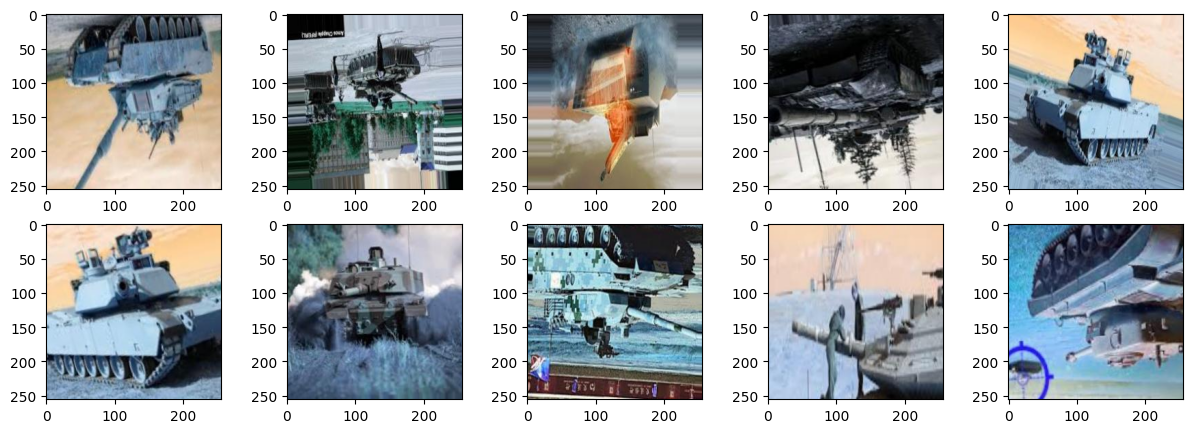

In [4]:
# Plot 10 images of the 'tanks' category in the dataset

imgTnk1 = mpimg.imread('/content/dataset/test/tanks/tanks_0_1005.jpeg')
imgTnk2 = mpimg.imread('/content/dataset/test/tanks/tanks_0_1025.jpeg')
imgTnk3 = mpimg.imread('/content/dataset/test/tanks/tanks_0_1055.jpeg')
imgTnk4 = mpimg.imread('/content/dataset/test/tanks/tanks_0_1088.jpeg')
imgTnk5 = mpimg.imread('/content/dataset/test/tanks/tanks_0_1092.jpeg')
imgTnk6 = mpimg.imread('/content/dataset/test/tanks/tanks_0_1128.jpeg')
imgTnk7 = mpimg.imread('/content/dataset/test/tanks/tanks_0_1101.jpeg')
imgTnk8 = mpimg.imread('/content/dataset/test/tanks/tanks_0_1130.jpeg')
imgTnk9 = mpimg.imread('/content/dataset/test/tanks/tanks_0_1202.jpeg')
imgTnk10 = mpimg.imread('/content/dataset/test/tanks/tanks_0_1260.jpeg')

tankArray = [imgTnk1, imgTnk2, imgTnk3, imgTnk4, imgTnk5, imgTnk6, imgTnk7,
             imgTnk8, imgTnk9, imgTnk10]

plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(tankArray[i])

plt.show()

These are the samples for the `tanks` category. Let's label the top left image as Image 1, the one to its left as Image 2, and so on until the bottom right image which is going to be Image 10. It was evident that these images had been pre-processed to begin with. All of them have the same size, about 250 x 250 pixels. Six out of ten images show upside down tanks. They all have orange-ish sky color, which indicated that the color balance had been adjusted. Most of them have dominant blue hue. The most important features that identify a tank is their tracks, their turret, and their gun which is attached to the turret. Usually the turret is big to support the cannon mounted on them. These images have overall showed that. Except Image 3 and 9. Image 3 only clearly shows a turret and a mounted gun but the tracks is pretty obscure. The graphic appears pixelated. It looks like it comes from a video game in the early 2000s. Meanwhile Image 9 doesn't show any tracks, just a turret and a gun with two people standing in the vicinity.  

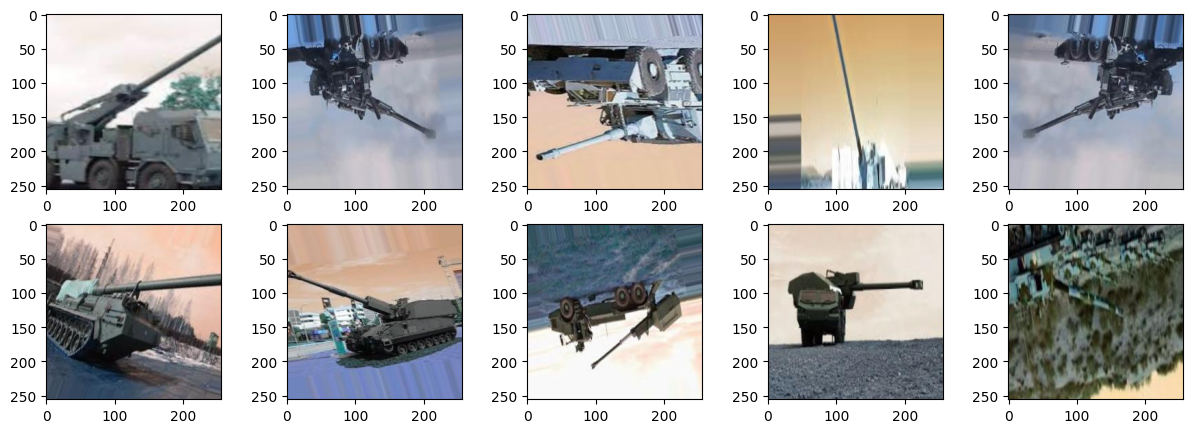

In [5]:
# Plot 10 images of the 'Self-propelled artillery' category in the dataset

imgSPA1 = mpimg.imread('/content/dataset/test/Self-propelled artillery/Self-propelled artillery_0_1000.jpeg')
imgSPA2 = mpimg.imread('/content/dataset/test/Self-propelled artillery/Self-propelled artillery_0_1293.jpeg')
imgSPA3 = mpimg.imread('/content/dataset/test/Self-propelled artillery/Self-propelled artillery_0_1279.jpeg')
imgSPA4 = mpimg.imread('/content/dataset/test/Self-propelled artillery/Self-propelled artillery_0_1094.jpeg')
imgSPA5 = mpimg.imread('/content/dataset/test/Self-propelled artillery/Self-propelled artillery_0_1.jpeg')
imgSPA6 = mpimg.imread('/content/dataset/test/Self-propelled artillery/Self-propelled artillery_0_1125.jpeg')
imgSPA7 = mpimg.imread('/content/dataset/test/Self-propelled artillery/Self-propelled artillery_0_1340.jpeg')
imgSPA8 = mpimg.imread('/content/dataset/test/Self-propelled artillery/Self-propelled artillery_0_1374.jpeg')
imgSPA9 = mpimg.imread('/content/dataset/test/Self-propelled artillery/Self-propelled artillery_0_1384.jpeg')
imgSPA10 = mpimg.imread('/content/dataset/test/Self-propelled artillery/Self-propelled artillery_0_1390.jpeg')

spAArray = [imgSPA1, imgSPA2, imgSPA3, imgSPA4, imgSPA5, imgSPA6, imgSPA7,
            imgSPA8, imgSPA9, imgSPA10]

plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(spAArray[i])

plt.show()

These are the samples for `Self-propelled artillery` category. They all have the same size. Five of them is flipped upside down. Their colors also appear to have been adjusted the same way as the `tanks` category. The majority of the vehicles in these samples have a mix between brown and green as their color (Image 1, 2, 6, 7, 8, and 9 for example). The defining feature of this category has to be the comically long gun that they're carrying. Like Image 5 for example, which is a 2S7 Pion that carry a gun longer than its hull. Some of them are tracked and some are wheeled. The wheeled ones are shown in Image 1, 2, 3, 5 (which seems to be a mirror of Image 2), 8, and 9. They're shaped like a truck. Image 4 and 10 are pretty obscure. The gun on Image 4 is squeezed so much that it looks like a pole, whereas the colors of the vehicles in Image 10 blended so well with the background.

# V. Feature Engineering

In this part we pre-processed the image again. Here we mainly rescale the image using ImageDataGenerator and resize it into 150 x 150 px images to reduce the number of features that the NN has to go through. We also utilized `flow_from_directory` to generate batches of the augmented data directly from the directory.

In [6]:
# Mount images from the dataset and pre-process them using ImageDataGenerator
# to produce image data for model training

# The pre-processing process by ImageDataGenerator involved is rescale

trainDataGen = ImageDataGenerator(rescale=1./255.)
testDataGen = ImageDataGenerator(rescale=1./255.)

train_gen = trainDataGen.flow_from_directory(
	"/content/dataset/train/",
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126,
	shuffle=False
)

test_gen = testDataGen.flow_from_directory(
	"/content/dataset/test/",
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126,
	shuffle=False
)

Found 10414 images belonging to 10 classes.
Found 3719 images belonging to 10 classes.


The code successfully registered the number of unique classes (the 10 types of military vehicles) that the dataset have. The train set has about 10414 images while the test set has 3719 images.

In [7]:
# Print the train and test dictionaries containing classes of military vehicles as
# keys

print(train_gen.class_indices)
print(test_gen.class_indices)

{'Anti-aircraft': 0, 'Armored combat support vehicles': 1, 'Armored personnel carriers': 2, 'Infantry fighting vehicles': 3, 'Light armored vehicles': 4, 'Mine-protected vehicles': 5, 'Prime movers and trucks': 6, 'Self-propelled artillery': 7, 'light utility vehicles': 8, 'tanks': 9}
{'Anti-aircraft': 0, 'Armored combat support vehicles': 1, 'Armored personnel carriers': 2, 'Infantry fighting vehicles': 3, 'Light armored vehicles': 4, 'Mine-protected vehicles': 5, 'Prime movers and trucks': 6, 'Self-propelled artillery': 7, 'light utility vehicles': 8, 'tanks': 9}


The code also successfully identified specifically the names of each classes in the dataset.

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


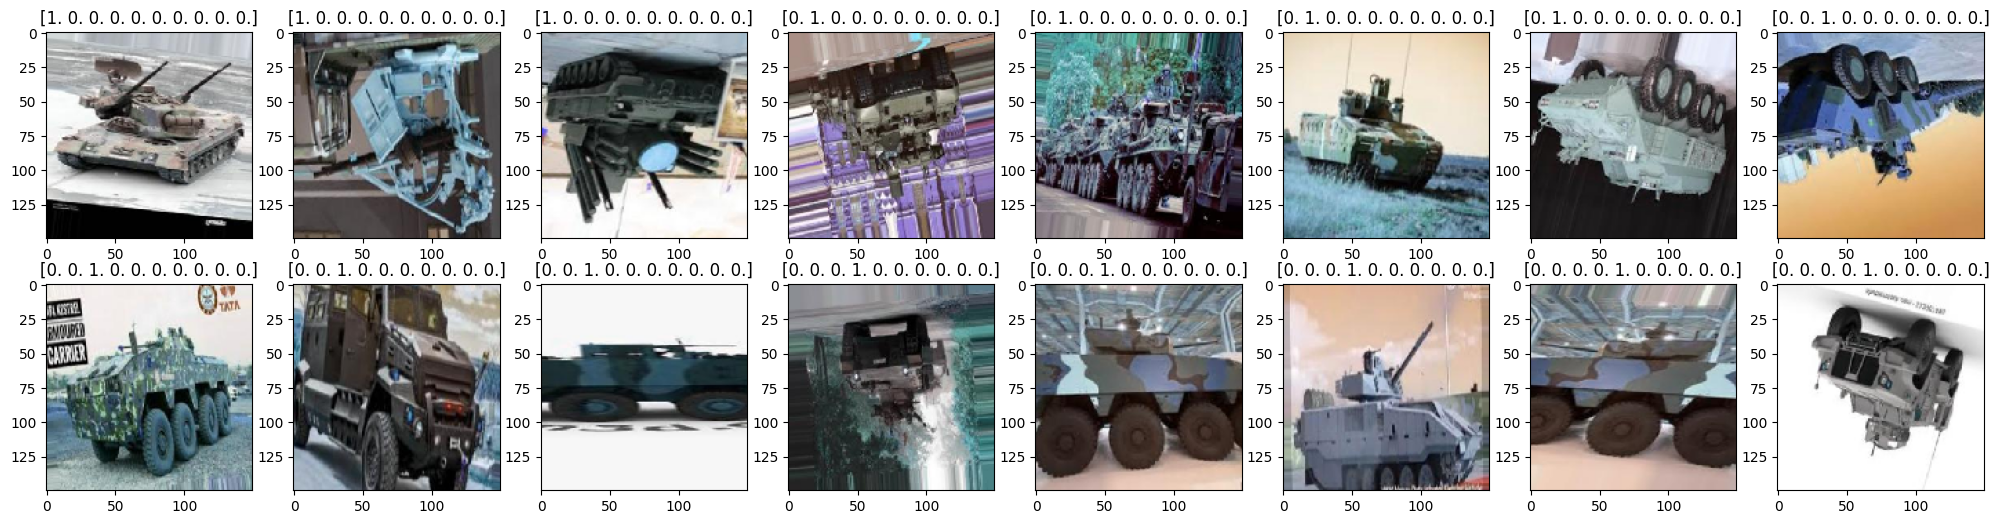

In [8]:
# Print the sample pre-processed images

fig,ax = plt.subplots(nrows=2,ncols=8,figsize=(25,6))
n = 0
idx = np.random.randint(len(train_gen.next()[0]), size=16)
for i in range(2):
  for j in range(8):
    img = train_gen.next()[0][idx[n]]
    ax[i][j].imshow(img)
    ax[i][j].set_title(train_gen.next()[1][idx[n]])
    n+=1

Most of these pre-processed images are distorted thanks to the resizing done by `flow_from_directory`. However, samples from the EDA suggested that some of these images had been distorted to begin with (such as Image 1 in the tanks category and Image 4 in the Self-propelled artillery category). These images are further distorted by the resizing done in this notebook.

# VI. First Neural Network

## VI.1. Model Definition

In this section we defined the first CNN model for the object detection purpose. The model trained here will be improved in the **Second Neural Network** section.

In [9]:
# This code is made to clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
# Create a Sequential API
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

The API we used is Sequential with 9 layers including input and output layer. There are three Conv2D layer equipped use ReLU activation function. All of them has 3 by 3 strides. The first Conv2D layer takes an input image of 150 x 150 x 3 px with 32 neurons. The second one has 64, while the third one has 128 neurons. Slipping between these Conv2D layers are MaxPooling2D layers with 2 by 2 strides to downsample the inputs. At the end of this checkerboard between Conv2D and MaxPooling2D layers is a GlobalAveragePooling2D layer to further reduce the features that the NN has to learn. The NN is allowed to Dropout unnecessary neuron which could prevent overfitting. The last two layers are Dense layers, with the last one being the output which consisted of ten neurons (matching the classes of military vehicles we have in the dataset). The first Dense layers have 512 neurons with ReLU activation function while the second one is equipped with softmax.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

This summary shows us that there are 164426 trainable parameters in our model.

## VI.2. Model Training

In training our first NN, the loss is set to `categorical_crossentropy`, the optimizer is set to `Adam`, while the metrics is set to `accuracy`. The training epochs is 40 with 20 steps per epochs. The batch is already predefined by the `flow_from_directory` syntax in the **Feature Engineering** section.

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(train_gen, epochs=40, steps_per_epoch=20, validation_data = test_gen, verbose = 1, validation_steps=10)

Epoch 1/40
20/20 [==============================] - 17s 438ms/step - loss: 2.3253 - accuracy: 0.1410 - val_loss: 2.5253 - val_accuracy: 0.0000e+00
Epoch 2/40
20/20 [==============================] - 7s 355ms/step - loss: 2.3642 - accuracy: 0.1000 - val_loss: 2.3218 - val_accuracy: 0.0000e+00
Epoch 3/40
20/20 [==============================] - 6s 327ms/step - loss: 2.2990 - accuracy: 0.0913 - val_loss: 2.3299 - val_accuracy: 0.0000e+00
Epoch 4/40
20/20 [==============================] - 6s 325ms/step - loss: 2.3105 - accuracy: 0.1000 - val_loss: 2.3326 - val_accuracy: 0.0000e+00
Epoch 5/40
20/20 [==============================] - 11s 554ms/step - loss: 2.2865 - accuracy: 0.2217 - val_loss: 2.3508 - val_accuracy: 0.0000e+00
Epoch 6/40
20/20 [==============================] - 6s 290ms/step - loss: 2.3101 - accuracy: 0.0500 - val_loss: 2.3519 - val_accuracy: 0.0000e+00
Epoch 7/40
20/20 [==============================] - 6s 311ms/step - loss: 2.3109 - accuracy: 0.0509 - val_loss: 2.3429 - v

The 40th epoch gave us 0.06 worth of prediction accuracy.

## VI.3. Model Evaluation

Here we print the result of the training and track the accuracy development per epoch.

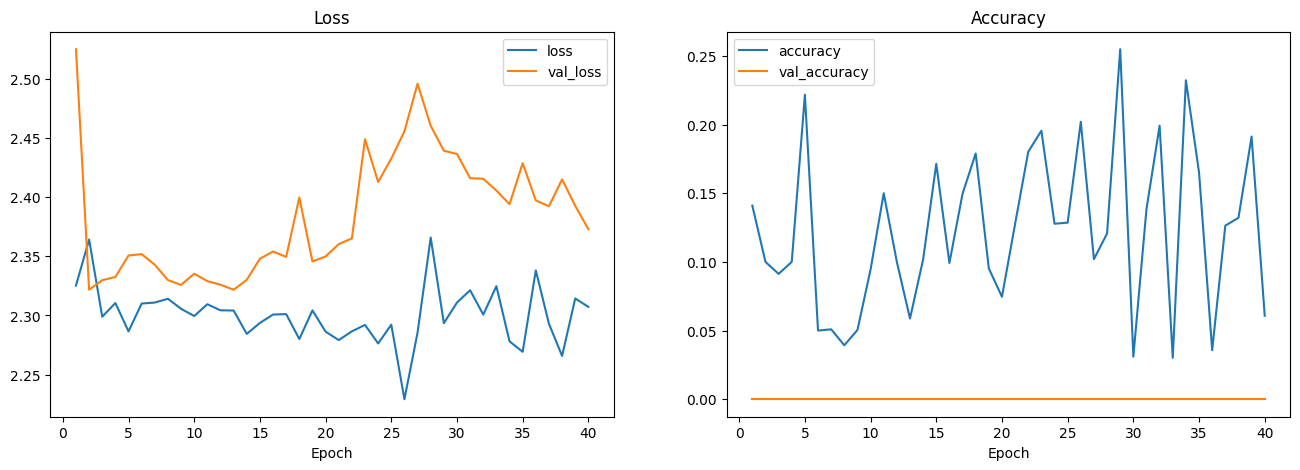

In [13]:
# Print training result

epoch=40

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

The accuracy, as shown by the right figure, fluctuated wildly while the validation accuracy stayed at zero. The loss was steadily declining when all of a sudden there's a spike somewhere between the 25th and the 30th epoch. Meanwhile the validation loss spiked prematurely somewhere between 20th and 25th epoch.

# VII. Second Neural Network

In this section we tried to improve the model made in the previous section. The plan here is to reduce the batch size into 64. The model's layers' structure is almost the same as the previous one, except here we substitute Flatten in place of GlobalAveragePooling2D. We redifine the feature engineering part before defining the new model.

## VII.1. Model Definition

In [14]:
# Reducing the batch size from 126 to 64

trainDataGenNew = ImageDataGenerator(rescale=1./255.)
testDataGenNew = ImageDataGenerator(rescale=1./255.)

train_gen_new = trainDataGenNew.flow_from_directory(
	"/content/dataset/train/",
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64,
	shuffle=False
)

test_gen_new = testDataGenNew.flow_from_directory(
	"/content/dataset/test/",
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64,
	shuffle=False
)

Found 10414 images belonging to 10 classes.
Found 3719 images belonging to 10 classes.


In [18]:
# This code is made to clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [19]:
# Create another Sequential API
modelNew = tf.keras.models.Sequential()

modelNew.add(tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(150, 150, 3)))
modelNew.add(tf.keras.layers.MaxPooling2D(2, 2))
modelNew.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
modelNew.add(tf.keras.layers.MaxPooling2D(2, 2))
modelNew.add(tf.keras.layers.Conv2D(128, (3,3),activation='relu'))
modelNew.add(tf.keras.layers.MaxPooling2D(2, 2))
modelNew.add(tf.keras.layers.Flatten())
modelNew.add(tf.keras.layers.Dropout(0.5))
modelNew.add(tf.keras.layers.Dense(512, activation='relu'))
modelNew.add(tf.keras.layers.Dense(10, activation='softmax'))

Here, instead of GlobalAveragePooling2D, we put in Flatten.

In [23]:
modelNew.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In this new model there are 19 million trainable parameters.

## VII.2. Model Training

We also increased the epoch size to 50.

In [20]:
modelNew.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

historyNew = modelNew.fit(train_gen_new, epochs=50, steps_per_epoch=20, validation_data = test_gen_new, verbose = 1, validation_steps=10)

Epoch 1/50
20/20 [==============================] - 5s 164ms/step - loss: 4.6759 - accuracy: 0.1430 - val_loss: 2.1598 - val_accuracy: 0.0000e+00
Epoch 2/50
20/20 [==============================] - 3s 128ms/step - loss: 2.3481 - accuracy: 0.1500 - val_loss: 2.2202 - val_accuracy: 0.4734
Epoch 3/50
20/20 [==============================] - 3s 145ms/step - loss: 2.3086 - accuracy: 0.0689 - val_loss: 2.2929 - val_accuracy: 0.4734
Epoch 4/50
20/20 [==============================] - 4s 184ms/step - loss: 2.3012 - accuracy: 0.1000 - val_loss: 2.2958 - val_accuracy: 0.4734
Epoch 5/50
20/20 [==============================] - 3s 147ms/step - loss: 2.3040 - accuracy: 0.0680 - val_loss: 2.2964 - val_accuracy: 0.4734
Epoch 6/50
20/20 [==============================] - 3s 130ms/step - loss: 2.3024 - accuracy: 0.0406 - val_loss: 2.2979 - val_accuracy: 0.4734
Epoch 7/50
20/20 [==============================] - 3s 170ms/step - loss: 2.2959 - accuracy: 0.0586 - val_loss: 2.3733 - val_accuracy: 0.0000e+0

By reducing the batch size into 64, substituting GlobalAveragePooling2D for Flatten, and increasing the epoch to 50, we acquired about 0.18 worth of training accuracy. It's a 0.12 increase from the model trained in the previous section.

## VII.3. Model Evaluation

Here we again printed the accuracy development through each epoch.

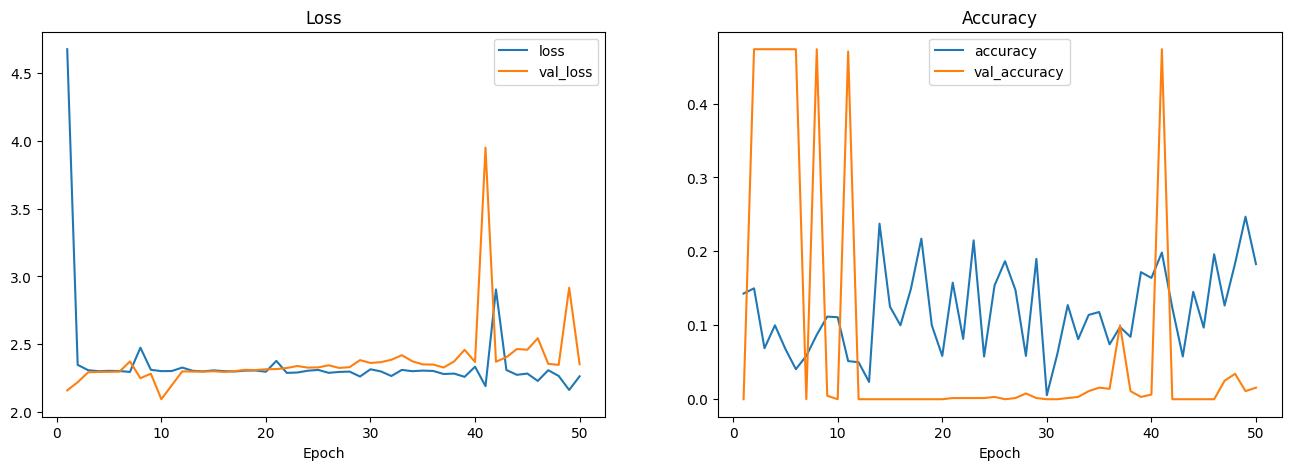

In [22]:
# Print training result

epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),historyNew.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),historyNew.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),historyNew.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),historyNew.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

As shown in the graph, the loss and the validation loss merged in around the 5th epoch. The separation between the two occurred in between the 20th and the 30th epoch. It then spiked near the 40th epoch, possibly the 41th. Meanwhile, the accuracy of the model still vary wildly throughout the training process. The validation accuracy oscillated for the first 12 epoch before dropping to zero. Same with the loss, it spike at near the 40th epoch.

# VIII. Model Saving

In this section we saved the second neural network which has a better prediction accuracy than the first one. First we freeze the model.

In [24]:
# Summary of the 2nd neural network

modelNew.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [25]:
# Freeze the model to turn the trainable parameters into non-trainable parameters

modelNew.trainable = False
modelNew.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

We now save the model

In [26]:
# Save the model

modelNew.save('milVehcDetect.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# IX. Model Inference

Here we will test the model on a couple images of destroyed military vehicles so far during the Russo-Ukrainian war. The images are uploaded manually into the colab directory. The code block below stored it in an array to show it side by side in the same manner done in the EDA section.

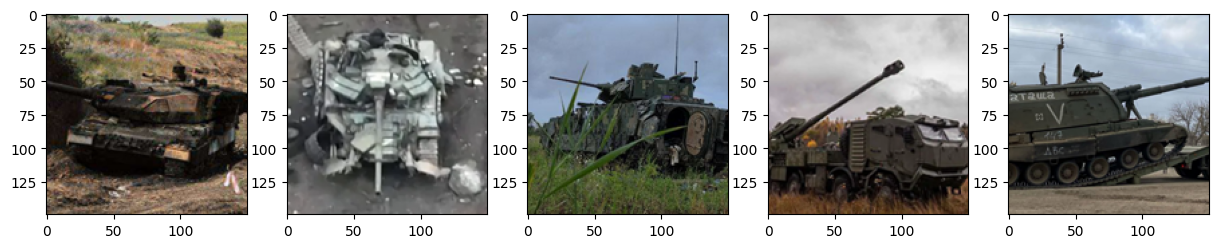

In [29]:
# Load the inference images

imgInf1 = mpimg.imread('imgInf1.png')
imgInf2 = mpimg.imread('imgInf2.png')
imgInf3 = mpimg.imread('imgInf3.png')
imgInf4 = mpimg.imread('imgInf4.png')
imgInf5 = mpimg.imread('imgInf5.png')

infArray = [imgInf1, imgInf2, imgInf3, imgInf4, imgInf5]

plt.figure(figsize=(15,5))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(infArray[i])

plt.show()

These images were resized into 150 x 150 pixels outside of this code. From left to right we have: Leopard 2A6 (`tanks`), T64BV (`tanks`), M2 Bradley (`Infantry fighting vehicles`), 2S22 Boghdana (`Self-propelled artillery`), and MSTA-B (`Self-propelled artillery`). We then defined a prediction function that print the class prediction of the image as well as the image itself.

In [31]:
# This function is used to classify the vehicle images shown by the block code above

def prediction(file):
  img = tf.keras.utils.load_img(file, target_size=(150, 150))
  x = tf.keras.utils.img_to_array(img)/255

  plt.imshow(img)

  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = modelNew.predict(images, batch_size=10)
  idx = np.argmax(classes)
  clas = ['Anti-aircraft','Armored combat support vehicles','Armored personnel carriers',
          'Infantry fighting vehicles','Light armored vehicles','Mine-protected vehicles',
          'Prime movers and trucks', 'Self-propelled artillery', 'light utility vehicles',
          'tanks']
  print('This is a {}'.format(clas[idx]))

We then test the model prediction on each image one by one as shown below.

1/1 [==============================] - 0s 18ms/step
This is a Mine-protected vehicles


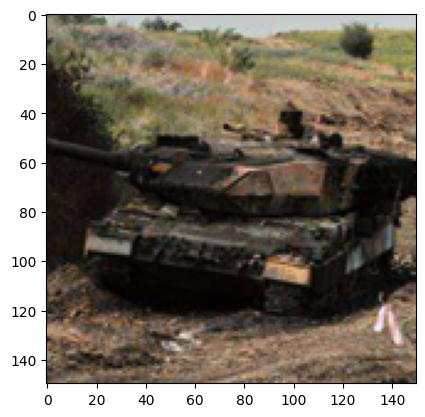

In [32]:
prediction('imgInf1.png')

1/1 [==============================] - 0s 18ms/step
This is a Mine-protected vehicles


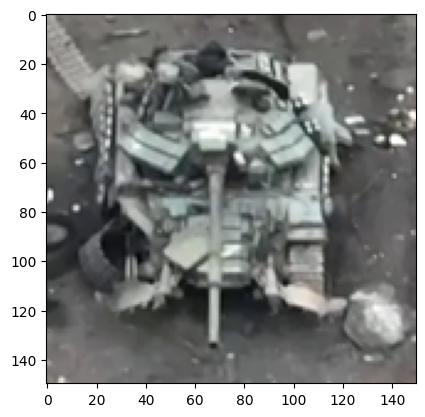

In [33]:
prediction('imgInf2.png')

1/1 [==============================] - 0s 17ms/step
This is a Mine-protected vehicles


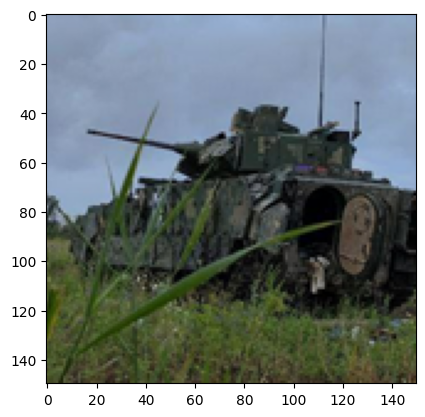

In [34]:
prediction('imgInf3.png')

1/1 [==============================] - 0s 18ms/step
This is a Mine-protected vehicles


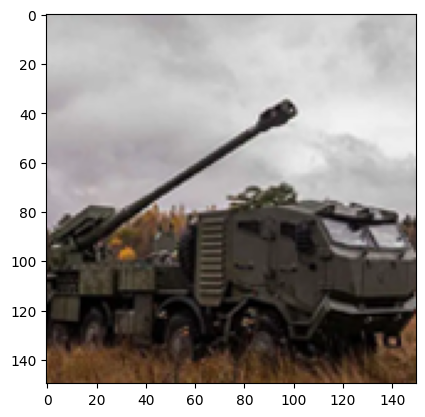

In [35]:
prediction('imgInf4.png')

1/1 [==============================] - 0s 17ms/step
This is a Infantry fighting vehicles


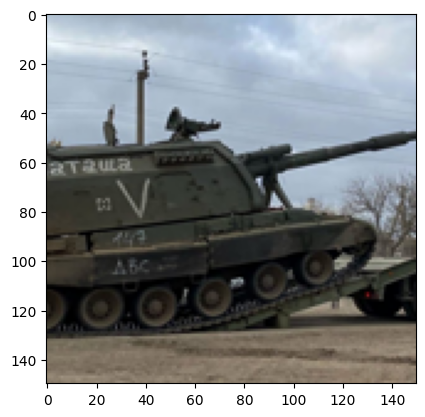

In [36]:
prediction('imgInf5.png')

From all of the inference images, the model didn't get a single one correctly.

# X. Conclusion

In this notebook we have trained a computer vision model using Convolution Neural Network. We have created two models. The difference between the two is the usage of GlobalAveragePooling2D in the former and Flatten in the latter. The dataset used consists of various classes of ground vehicles: `Anti-aircraft`, `Armored combat support vehicles`, `Armored personnel carriers`, `Infantry fighting vehicles`, `Light armored vehicles`, `Mine-protected vehicles`, `Prime movers and trucks`, `Self-propelled artillery`, `light utility vehicles`, and `tanks`. The images is already divided into train set and test set, both are already pre-processed beforehand. This notebook processed them again by resizing it into 150 x 150 px and rescaling it using ImageDataGenerator. The accuracy of both model varied wildly during the training process. Both are trained using `categorical_crossentropy` for the loss, and `Adam` for the optimizer. Nevertheless, the second model ended up with a better accuracy value of 18%. This accuracy improvement is achieved by reducing the batch size from 126 to 64, increasing the epoch from 40 to 50, and substituing GlobalAveragePooling2D layer for Flatten layer. \

The second model is then saved and tested against five images of vehicles from the Russo-Ukrainian war. The images are Leopard 2A6 (`tanks`), T64BV (`tanks`), M2 Bradley (`Infantry fighting vehicles`), 2S22 Boghdana (`Self-propelled artillery`), and MSTA-B (`Self-propelled artillery`). The model didn't guess a single one correctly. It guessed the first four as a `Mine-protected vehicles` and the MSTA-B as `Infantry fighting vehicles`.